## Loading the audio dataset

In [4]:
import librosa
audio_path = 'dataset/genres/blues/blues.00001.wav'
x , sampling_rate = librosa.load(audio_path)


## Visualizing the dataset using waveplot

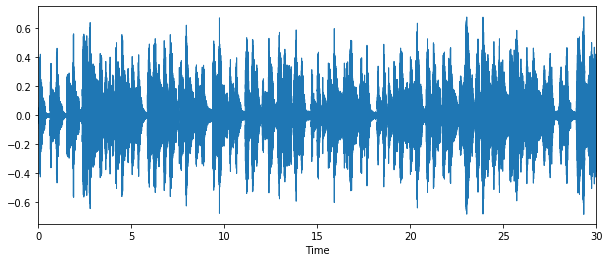

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10, 4))
librosa.display.waveplot(x, sr=sampling_rate)

In [31]:
import IPython.display as ipd
ipd.Audio(audio_path)

## Spectrogram conversion

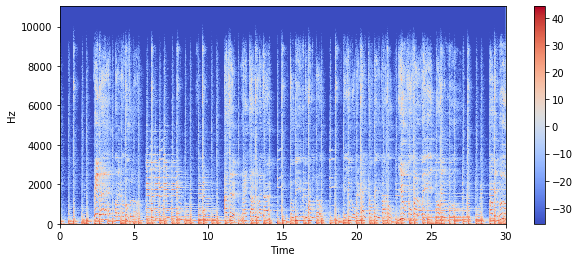

In [9]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(10, 4))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()

## Feature Extraction

## Zero crossing rate

2


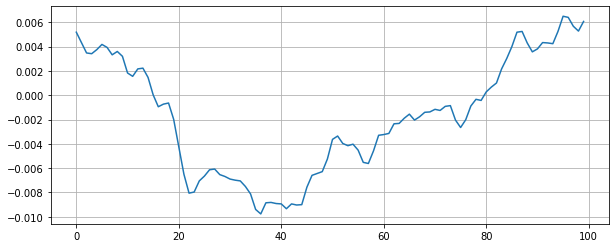

In [11]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(10, 4))
plt.plot(x[n0:n1])
plt.grid()

zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

## Spectral centroid

In [ ]:
# import sklearn

spectral_centroids = librosa.feature.spectral_centroid(x, sr=sampling_rate)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

## Spectral rolloff

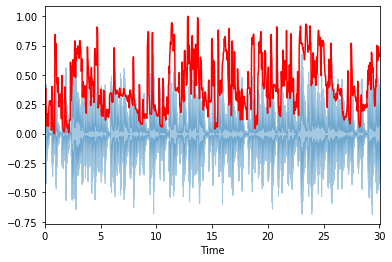

In [16]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

## Mel frequency capstrum coefficients(MFCCs) feature

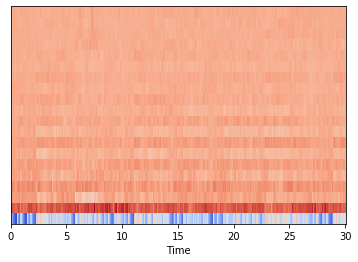

In [18]:
mfccs = librosa.feature.mfcc(x, sr=sampling_rate)

#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

[ 4.1027173e-09  1.6272574e-08  8.2976301e-09  1.9597390e-08
  1.9960410e-08  1.3460601e-08  7.1451817e-10 -4.0197410e-08
  6.2232230e-10  1.0602528e-09 -1.3714139e-08 -6.3684311e-08
 -3.5956398e-09  1.9361137e-08 -1.8692717e-08  5.9927330e-10
  1.2723033e-08 -2.5319297e-08  3.9183257e-09  2.1666036e-09]
[1.0000007  0.9999999  1.000001   0.9999982  0.99999964 0.9999999
 1.0000007  0.9999998  0.9999998  1.0000018  1.0000015  0.9999998
 1.0000004  1.         1.0000004  1.0000005  1.0000005  1.0000007
 0.9999997  0.9999997 ]


c:\users\dapplogix\anaconda3\envs\soundclassification\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
c:\users\dapplogix\anaconda3\envs\soundclassification\lib\site-packages\sklearn\preprocessing\data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


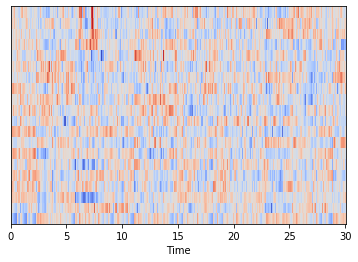

In [19]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

## Chroma feature

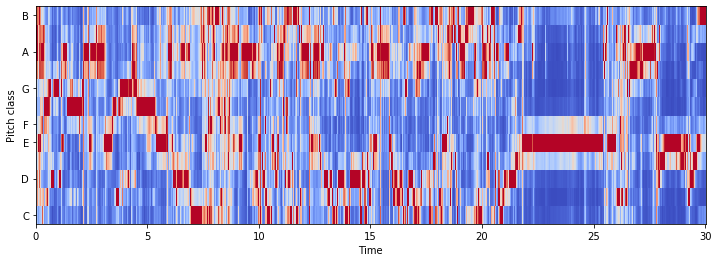

In [22]:
# Loadign the file
x, sr = librosa.load('dataset/genres/rock/rock.00001.wav')
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(12, 4))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

## Extracting features from Spectrogram

In [25]:
import pathlib,os
cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10,10))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'./dataset/genres/{g}'):
        songname = f'./dataset/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

c:\users\dapplogix\anaconda3\envs\soundclassification\lib\site-packages\matplotlib\axes\_axes.py:7739: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


<Figure size 720x720 with 0 Axes>

In [26]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

## Writing data to csv file


In [30]:
import csv
import numpy as np
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'./dataset/genres/{g}'):
        songname = f'./dataset/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())
